<a href="https://colab.research.google.com/github/tongnet/fin7047_2026spr/blob/main/lec3_crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-4181192635.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bitcoin_data = yf.download('BTC-USD', start='2014-01-15', end='2026-01-15')
[*********************100%***********************]  1 of 1 completed


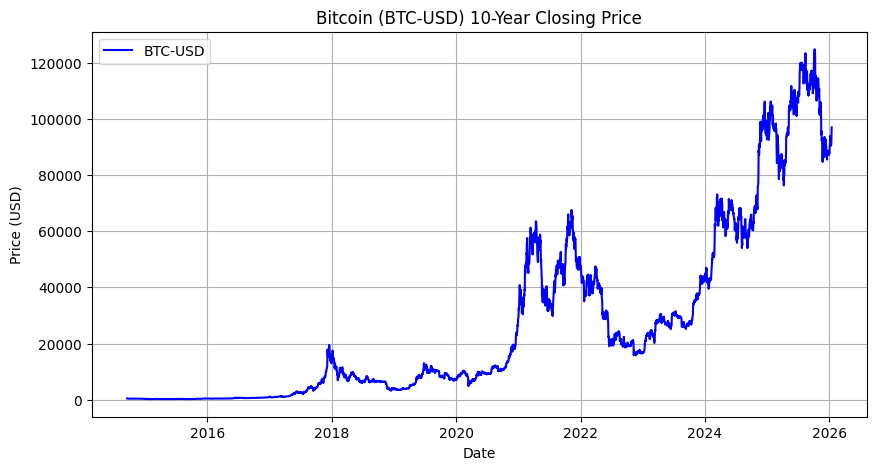

In [1]:
# Plot Bitcoin historical prices
#!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt

# Downloading 12-year Bitcoin data from Yahoo Finance
bitcoin_data = yf.download('BTC-USD', start='2014-01-15', end='2026-01-15')

# Plotting the closing price of Bitcoin over the 10-year period
plt.figure(figsize=(10, 5))
plt.plot(bitcoin_data['Close'], label='BTC-USD', color='blue')
plt.title('Bitcoin (BTC-USD) 12-Year Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
first_5_days = bitcoin_data.head(5)
print(first_5_days)

Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834991  384.532013  424.102997  37919700
2014-09-20  408.903992  423.295990  389.882996  394.673004  36863600
2014-09-21  398.821014  412.425995  393.181000  408.084991  26580100


In [3]:
last_5_days = bitcoin_data.tail(5)
print(last_5_days)

Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2026-01-10  90386.648438  90713.031250  90283.398438  90510.101562   
2026-01-11  90827.460938  91155.226562  90212.023438  90385.359375   
2026-01-12  91192.992188  92395.523438  90055.023438  90825.859375   
2026-01-13  95321.781250  96011.625000  90941.929688  91185.335938   
2026-01-14  96929.328125  97860.601562  94583.046875  95322.906250   

Price            Volume  
Ticker          BTC-USD  
Date                     
2026-01-10  12385895282  
2026-01-11  17165568977  
2026-01-12  41346275358  
2026-01-13  54980674354  
2026-01-14  60592490863  


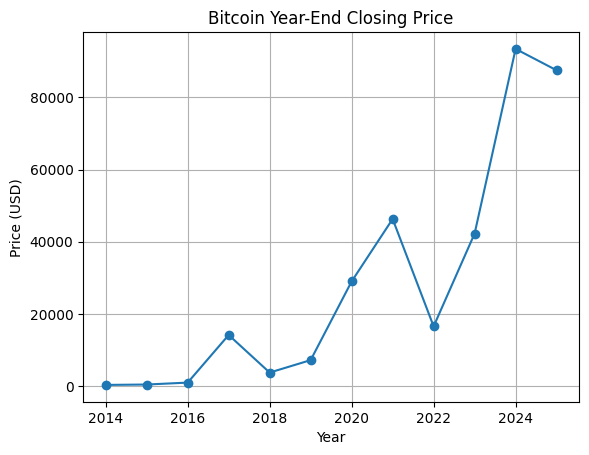

Price          Close
Ticker       BTC-USD
Date                
2014      320.192993
2015      430.566986
2016      963.742981
2017    14156.400391
2018     3742.700439
2019     7193.599121
2020    29001.720703
2021    46306.445312
2022    16547.496094
2023    42265.187500
2024    93429.203125
2025    87508.828125


In [4]:
# Keep the last price in each year
datadec_data = bitcoin_data[bitcoin_data.index.month == 12]

# Pick last available day of each December
year_end=datadec_data.groupby(datadec_data.index.year)['Close'].last()

# Plot
plt.plot(year_end.index, year_end.values, marker='o')
plt.title('Bitcoin Year-End Closing Price')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

print(year_end)

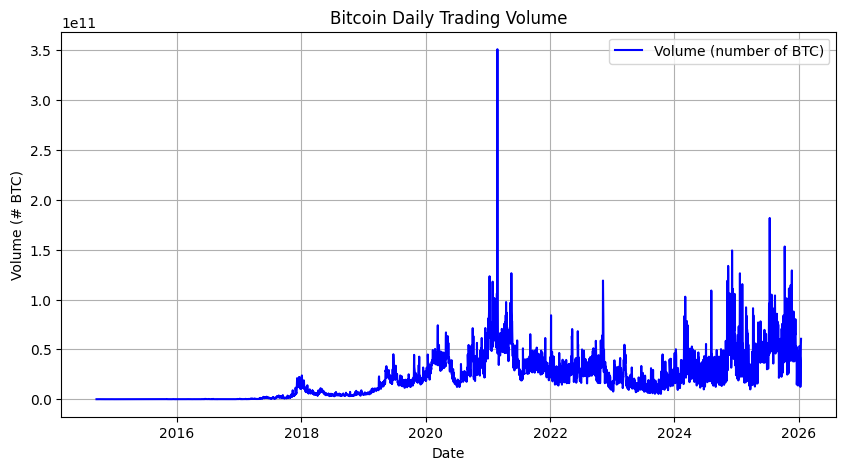

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(bitcoin_data['Volume'], label='Volume (number of BTC)', color='blue')
plt.title('Bitcoin Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume (# BTC)')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# download data and save dataset on google drive
from google.colab import drive
drive.mount('/content/drive')
filepath = "/content/drive/MyDrive/bitcoin_daily_data_10y.csv"
#bitcoin_data.to_csv(filepath, index=True)

import yfinance as yf
import datetime

ticker_symbol = "BTC-USD"
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=10*365)

bitcoin_data = yf.download(
    ticker_symbol,
    start=start_date,
    end=end_date,
    interval="1d"
)

bitcoin_data.to_csv("/content/drive/MyDrive/bitcoin_daily_data_10y.csv")
bitcoin_data.to_csv("bitcoin_daily_data_10y.csv")

/tmp/ipython-input-2705062663.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bitcoin_data = yf.download(
[*********************100%***********************]  1 of 1 completed

Mounted at /content/drive


In [7]:
import os

os.path.exists("/content/drive/MyDrive")

True

In [ ]:
bitcoin_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [8]:
# Candle stick plot

import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = yf.Ticker("MSFT").history(period="5y")

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_heights=[0.7, 0.3], vertical_spacing=0.02)

fig.add_trace(go.Candlestick(
    x=df.index,
    open=df["Open"],
    high=df["High"],
    low=df["Low"],
    close=df["Close"]
), row=1, col=1)

colors = ["#8bd17c" if c >= o else "#d84a4a" for o, c in zip(df["Open"], df["Close"])]
fig.add_trace(go.Bar(x=df.index, y=df["Volume"], marker_color=colors), row=2, col=1)

fig.update_layout(template="plotly_dark", xaxis_rangeslider_visible=False, height=600, showlegend=False)
fig.update_yaxes(side="right", row=1, col=1)
fig.update_yaxes(side="right", row=2, col=1)

fig.show()

In [9]:
# Calculate Bitcoin daily, weekly, monthly, and annual returns and save it in a file
import pandas as pd
# Load the data
#filepath = "d:/tong/bitcoin_daily_data_10y.csv"   # Jupyter path
filepath = "/content/drive/MyDrive/bitcoin_daily_data_10y.csv"  # Google Colab path

# Skip the first two rows
ret = pd.read_csv(filepath, skiprows=2)

# Rename the first column to Date
ret.rename(columns={'Price': 'Date'}, inplace=True)

# Convert Date to datetime
ret['Date'] = pd.to_datetime(ret['Date'])

# Set Date as index
ret.set_index('Date', inplace=True)

# Keep only needed columns
ret.columns = ['Close', 'High', 'Low', 'Open', 'Volume']


ret['Daily Return'] = ret['Close'].pct_change()
ret['Weekly Return'] = ret['Close'].pct_change(periods=7)
ret['Monthly Return'] = ret['Close'].pct_change(periods=30)
ret['Annual Return'] = ret['Close'].pct_change(periods=365)

bitcoin_data.to_csv("/content/drive/MyDrive/bitcoin_returns_10y.csv")  # save to google drive
print("saved to /content/drive/MyDrive/bitcoin_returns_10y.csv")

# Save the DataFrame with all returns to a new CSV file
output_file_path = 'bitcoin_returns_10y.csv'
ret.to_csv(output_file_path)

output_file_path

saved to /content/drive/MyDrive/bitcoin_returns_10y.csv


'bitcoin_returns_10y.csv'

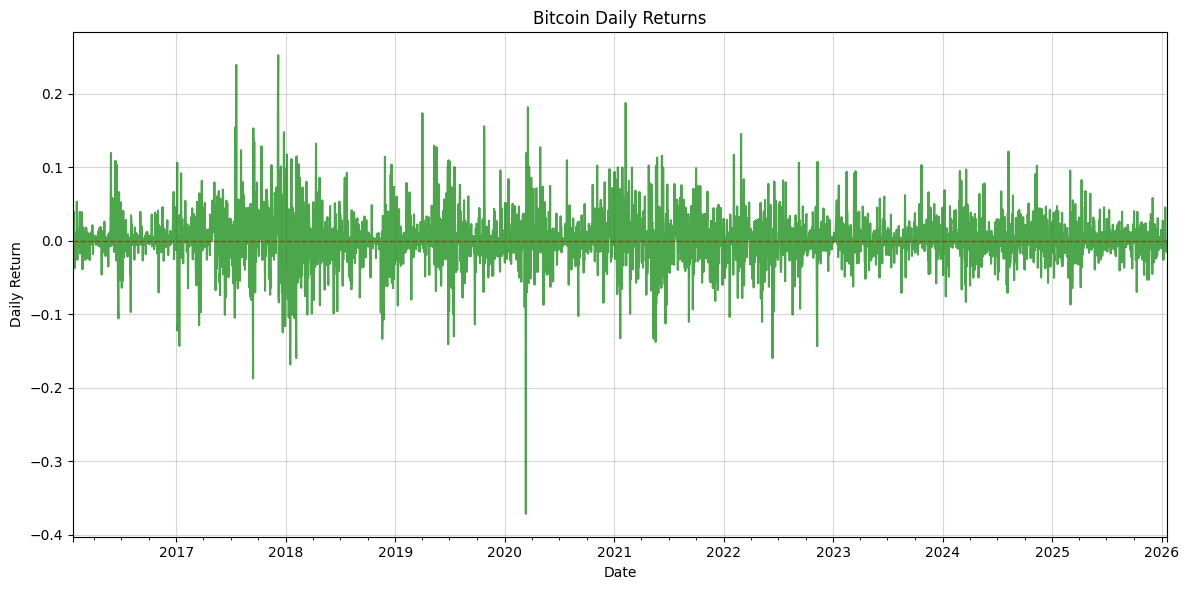

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset containing returns
filepath = "/content/drive/MyDrive/bitcoin_returns.csv"  # Update this to the path of your return dataset
return_data = pd.read_csv(
    filepath,
    index_col=0,      # first column contains dates
    parse_dates=True  # parse index as datetime
)

# Plot daily returns
plt.figure(figsize=(12, 6))
return_data['Daily Return'].plot(color='green', alpha=0.7, title='Bitcoin Daily Returns')
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(alpha=0.5)
plt.tight_layout()

# Save the plot
plot_filepath = 'bitcoin_daily_returns_from_dataset.png'
plt.savefig(plot_filepath)
plt.show()

In [11]:
# Obtain parameters of the return distribution
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Load the dataset containing returns
filepath = "/content/drive/MyDrive/bitcoin_returns.csv"  # Update this to the path of your return dataset
return_data = pd.read_csv(
    filepath,
    index_col=0,      # first column contains dates
    parse_dates=True  # parse index as datetime
)

daily_returns = return_data['Daily Return'].dropna()

# Calculate statistics
mean_return = daily_returns.mean()
median_return = daily_returns.median()
std_dev_return = daily_returns.std()
skewness_return = skew(daily_returns)
kurtosis_return = kurtosis(daily_returns)
percentile_5 = np.percentile(daily_returns, 5)
percentile_95 = np.percentile(daily_returns, 95)

# Create a results table
stats_table = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Standard Deviation", "Skewness", "Kurtosis", "5th Percentile", "95th Percentile"],
    "Value": [
        mean_return, median_return, std_dev_return, skewness_return, kurtosis_return, percentile_5, percentile_95
    ]
})
print(stats_table)  # Display the table

            Statistic     Value
0                Mean  0.002122
1              Median  0.001289
2  Standard Deviation  0.034973
3            Skewness -0.027504
4            Kurtosis  8.062368
5      5th Percentile -0.052731
6     95th Percentile  0.055130


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3196544455.py:14: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


Saved to Google Drive → MyDrive/eth_price_volume_data.csv
Saved to colab runtime/eth_price_volume_data.csv


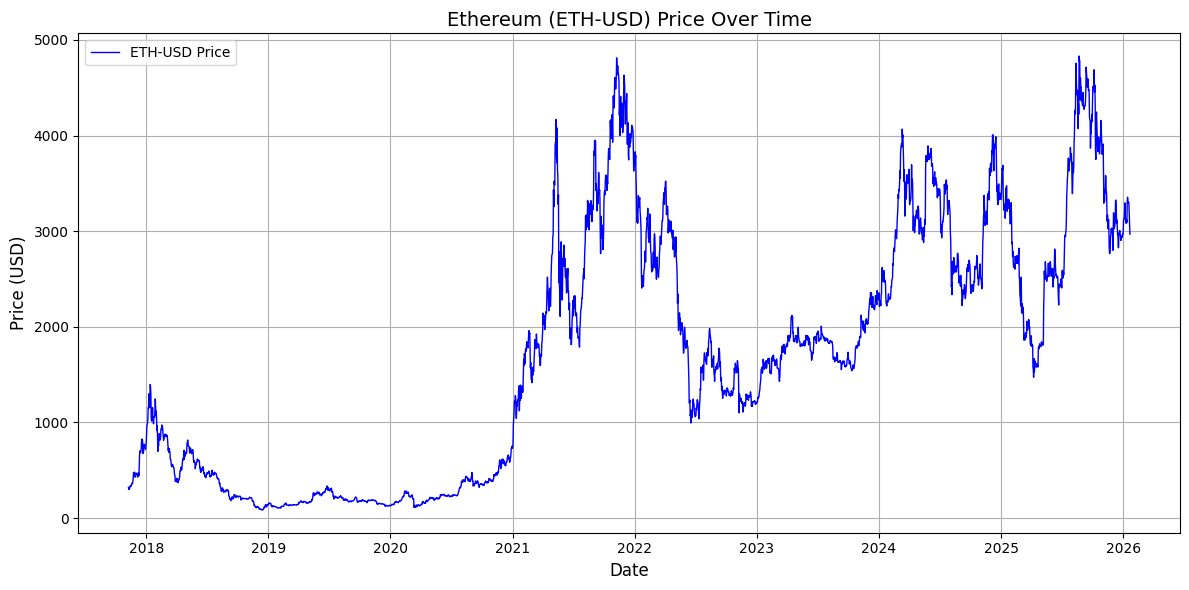

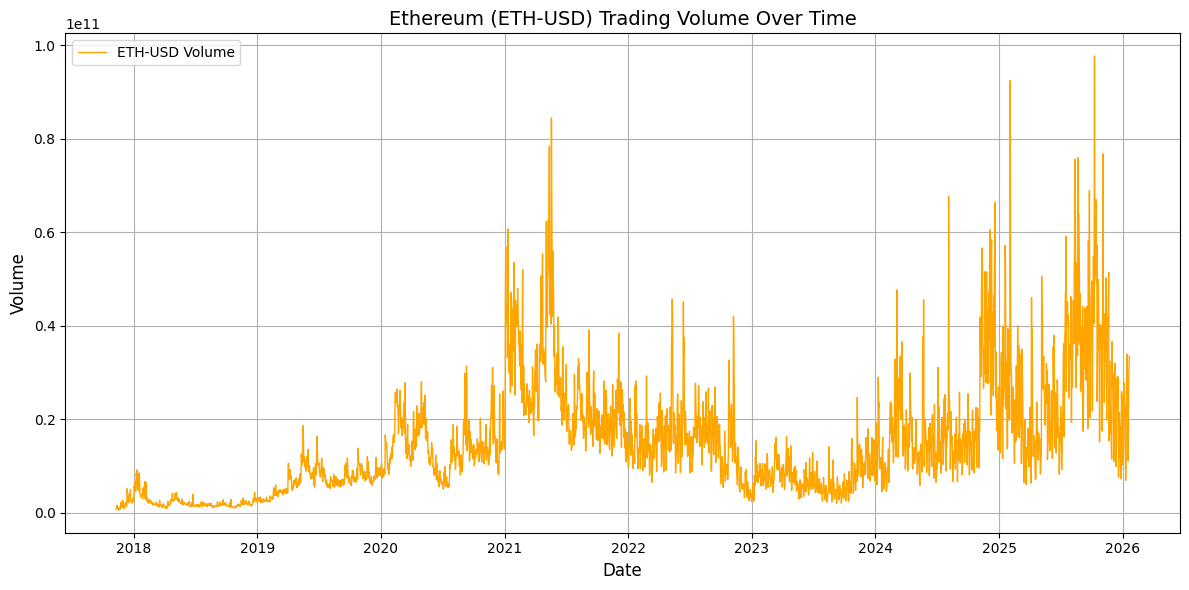

In [12]:
# get price, volume, and return data for ETH

import yfinance as yf
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the ticker symbol for Ethereum
ticker_symbol = "ETH-USD"

# Download data from Yahoo Finance
eth_data = yf.download(ticker_symbol, start="2010-01-01", interval="1d")

# Save the data to Google Drive (MyDrive)
eth_data.to_csv("/content/drive/MyDrive/eth_price_volume_data.csv")
print("Saved to Google Drive → MyDrive/eth_price_volume_data.csv")

# Save the data to colab runtime
eth_data.to_csv("eth_price_volume_data.csv")
print("Saved to colab runtime/eth_price_volume_data.csv")

# Extract price (Close) and volume data
eth_prices = eth_data['Close']
eth_volume = eth_data['Volume']

# Convert index to NumPy array for plotting
dates = eth_data.index.to_numpy()
prices = eth_prices.to_numpy()
volume = eth_volume.to_numpy()

# Plot the Ethereum price data
plt.figure(figsize=(12, 6))
plt.plot(dates, prices, label='ETH-USD Price', color='blue', linewidth=1)
plt.title('Ethereum (ETH-USD) Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the Ethereum volume data
plt.figure(figsize=(12, 6))
plt.plot(dates, volume, label='ETH-USD Volume', color='orange', linewidth=1)
plt.title('Ethereum (ETH-USD) Trading Volume Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


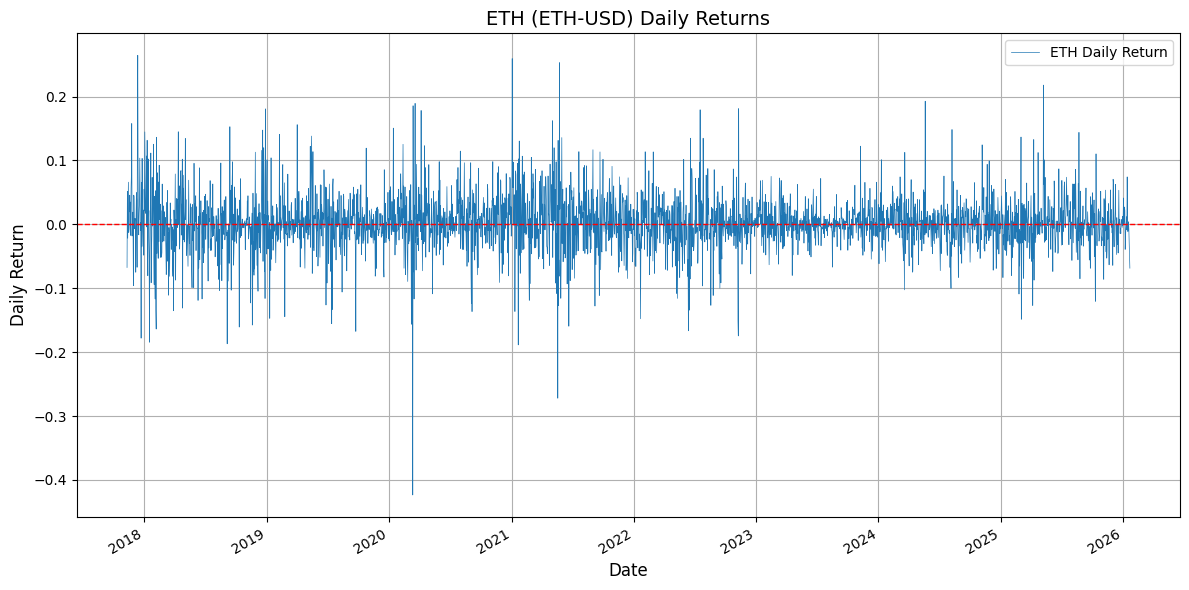

In [13]:
# Calculate ETH daily return; save to a file; plot daily return
import pandas as pd
import matplotlib.pyplot as plt

# Load XRP data from CSV
filepath = "eth_price_volume_data.csv"

# Load data from CSV, skip first two rows
eth_data = pd.read_csv(filepath, skiprows=2)

# Rename columns properly - assuming the order is Date, Close, High, Low, Open, Volume
eth_data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert Date to datetime
eth_data['Date'] = pd.to_datetime(eth_data['Date'])

# Set Date as index
eth_data.set_index('Date', inplace=True)

# Keep only needed columns
eth_data = eth_data[['Close', 'Volume']]

# Calculate daily returns
eth_data['Daily Return'] = eth_data['Close'].pct_change()

# Save the daily return data to a new CSV file
eth_data.to_csv("eth_daily_returns.csv")

# Plot the daily returns
plt.figure(figsize=(12, 6))
eth_data['Daily Return'].plot(label='ETH Daily Return', linewidth=0.5)
plt.title('ETH (ETH-USD) Daily Returns', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Highlight zero return line
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# prepare data for XRP

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker symbol for XRP (Ripple)
ticker_symbol = "XRP-USD"

# Define the time period (last five years)
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=10*365)  # 10 years ago
# Get the data from Yahoo Finance
xrp_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")

# Save the data to a CSV file (optional)
xrp_data.to_csv("xrp_price_volume_data.csv")

/tmp/ipython-input-2394968830.py:14: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


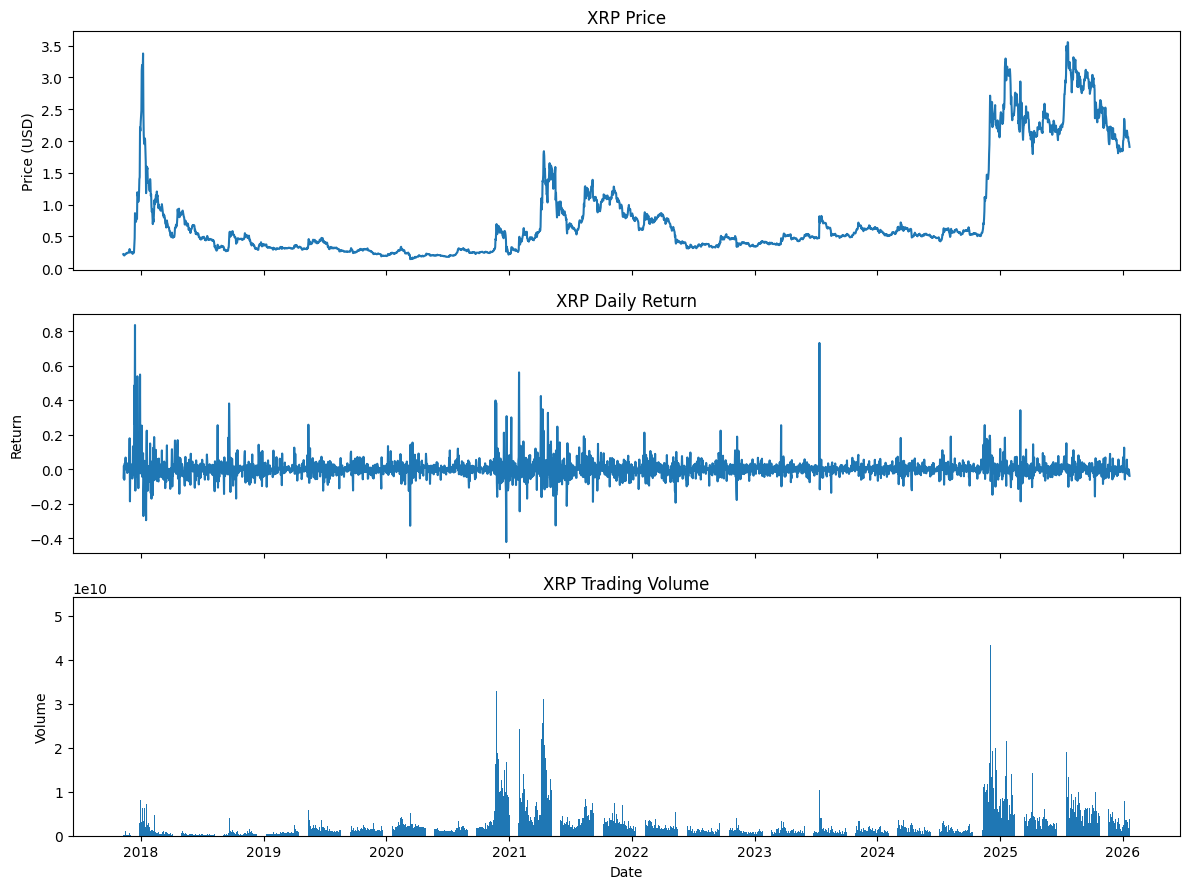

In [15]:
# get xrp return and plot price, return, and volume

import pandas as pd
import matplotlib.pyplot as plt

# Load XRP data from CSV
filepath = "xrp_price_volume_data.csv"

# Skip the first two rows and read with specified column names
xrp_data = pd.read_csv(filepath, skiprows=2)

# Rename columns properly - assuming the order is Date, Close, High, Low, Open, Volume
xrp_data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert Date to datetime
xrp_data['Date'] = pd.to_datetime(xrp_data['Date'])

# Set Date as index
xrp_data.set_index('Date', inplace=True)

# Keep only needed columns
xrp_data = xrp_data[['Close', 'Volume']]

# Calculate daily returns
xrp_data['Daily Return'] = xrp_data['Close'].pct_change()

# Save the daily return data to a new CSV file
xrp_data.to_csv("xrp_daily_returns.csv")

# ===== Plotting =====
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 9), sharex=True)

# 1️⃣ Price
axes[0].plot(xrp_data.index, xrp_data['Close'])
axes[0].set_title("XRP Price")
axes[0].set_ylabel("Price (USD)")

# 2️⃣ Daily Return
axes[1].plot(xrp_data.index, xrp_data['Daily Return'])
axes[1].set_title("XRP Daily Return")
axes[1].set_ylabel("Return")

# 3️⃣ Volume
axes[2].bar(xrp_data.index, xrp_data['Volume'])
axes[2].set_title("XRP Trading Volume")
axes[2].set_ylabel("Volume")
axes[2].set_xlabel("Date")

plt.tight_layout()
plt.show()

In [16]:
#Get sp500 price and Volume from Yahoo Finance
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker symbol for Ethereum
ticker_symbol = "^GSPC"

# Define the time period (last five years)
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=10*365)  # 10 years ago
# Get the data from Yahoo Finance
sp500_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")

# Save the data to a CSV file (optional)
sp500_data.to_csv("sp500_price_volume_data.csv")

/tmp/ipython-input-2885219581.py:13: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [17]:
# plot the first five observations
import pandas as pd

# Load data from CSV, skip first two rows
filepath = "sp500_price_volume_data.csv"
sp500_data = pd.read_csv(filepath, skiprows=2)

# Rename columns properly
sp500_data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert Date column to datetime
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Set Date as index
sp500_data.set_index('Date', inplace=True)

# Calculate daily returns
sp500_data['Daily Return'] = sp500_data['Close'].pct_change()

print(sp500_data.head())

# Save cleaned data to CSV
output_file = "sp500_return_data.csv"
sp500_data.to_csv(output_file)

print(f"Data saved to {output_file}")

                  Close         High          Low         Open      Volume  \
Date                                                                         
2016-01-25  1877.079956  1906.280029  1875.969971  1906.280029  4401380000   
2016-01-26  1903.630005  1906.729980  1878.790039  1878.790039  4357940000   
2016-01-27  1882.949951  1916.989990  1872.699951  1902.520020  4754040000   
2016-01-28  1893.359985  1902.959961  1873.650024  1885.219971  4693010000   
2016-01-29  1940.239990  1940.239990  1894.000000  1894.000000  5497570000   

            Daily Return  
Date                      
2016-01-25           NaN  
2016-01-26      0.014144  
2016-01-27     -0.010863  
2016-01-28      0.005529  
2016-01-29      0.024760  
Data saved to sp500_return_data.csv


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load XRP data from CSV
filepath = "sp500_price_volume_data.csv"

# Skip the first two rows
sp500_data = pd.read_csv(filepath, skiprows=2)

# Rename the first column to Date
sp500_data.rename(columns={'Price': 'Date'}, inplace=True)

# Keep only needed columns
sp500_data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert Date to datetime
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Calculate daily returns
sp500_data['Daily Return'] = sp500_data['Close'].pct_change()

# Save the daily return data to a new CSV file
sp500_data.to_csv("sp500_daily_returns.csv")

In [19]:
# Read daily returns of different assets and combine them; compare daily returns
import pandas as pd

# Load datasets with Date as index
btc_data = pd.read_csv("bitcoin_returns_10y.csv", parse_dates=['Date'], index_col='Date', date_format='%Y-%m-%d')
eth_data = pd.read_csv("eth_daily_returns.csv", parse_dates=['Date'], index_col='Date', date_format='%Y-%m-%d')
xrp_data = pd.read_csv("xrp_daily_returns.csv", parse_dates=['Date'], index_col='Date', date_format='%Y-%m-%d')
sp500_data = pd.read_csv("sp500_return_data.csv", parse_dates=['Date'], index_col='Date', date_format='%Y-%m-%d')

# Retain only "Daily Return" columns and rename
btc_data = btc_data[['Daily Return']].rename(columns={'Daily Return': 'BTC'})
eth_data = eth_data[['Daily Return']].rename(columns={'Daily Return': 'ETH'})
xrp_data = xrp_data[['Daily Return']].rename(columns={'Daily Return': 'XRP'})
sp500_data = sp500_data[['Daily Return']].rename(columns={'Daily Return': 'SP500'})

# Concatenate datasets (aligning on index using outer join to keep all dates)
combined_data = pd.concat([sp500_data, btc_data, eth_data, xrp_data], axis=1, join='outer')

# Ensure index is datetime
combined_data.index = pd.to_datetime(combined_data.index)

# Add a 'Year' column for grouping
combined_data['Year'] = combined_data.index.year

# Compute yearly average returns for each security, skipping NaN values
yearly_avg_returns = combined_data.groupby('Year').mean()

# Compute overall average returns for all years, skipping NaN values
all_years_avg = combined_data.drop(columns='Year').mean().to_frame(name='All Years').T

# Concatenate overall average with yearly averages
final_avg_returns = pd.concat([yearly_avg_returns, all_years_avg])

# Save results to CSV
output_file = "average_returns_summary1.csv"
final_avg_returns.to_csv(output_file)

print(f"Average returns summary saved to {output_file}.")
final_avg_returns

Average returns summary saved to average_returns_summary1.csv.


,SP500,BTC,ETH,XRP
2016,0.000773,0.002812,NaN,NaN
2017,0.000716,0.008612,0.018814,0.058115
2018,-0.000199,-0.002729,-0.003163,-0.002841
2019,0.001038,0.002417,0.000771,-0.000979
2020,0.000832,0.004582,0.006070,0.002207
2021,0.000980,0.002165,0.005983,0.006678
2022,-0.000745,-0.002257,-0.002046,-0.001460
2023,0.000902,0.002830,0.002065,0.002577
2024,0.000863,0.002558,0.001606,0.004257
2025,0.000676,0.000061,0.000447,0.000603


In [21]:
# estimate standard deviations of different cryptos
import pandas as pd
import numpy as np

# Load datasets
btc_data = pd.read_csv("bitcoin_returns_10y.csv", parse_dates=['Date'], index_col='Date')
eth_data = pd.read_csv("eth_daily_returns.csv", parse_dates=['Date'], index_col='Date')
xrp_data = pd.read_csv("xrp_daily_returns.csv", parse_dates=['Date'], index_col='Date')
sp500_data = pd.read_csv("sp500_return_data.csv", parse_dates=['Date'], index_col='Date')

# Retain only "Daily Return" columns and rename
btc_data = btc_data[['Daily Return']].rename(columns={'Daily Return': 'BTC Return'})
eth_data = eth_data[['Daily Return']].rename(columns={'Daily Return': 'ETH Return'})
xrp_data = xrp_data[['Daily Return']].rename(columns={'Daily Return': 'XRP Return'})
sp500_data = sp500_data[['Daily Return']].rename(columns={'Daily Return': 'SP500 Return'})

# Combine all into one DataFrame (outer join to align dates)
combined_data = pd.concat([sp500_data, btc_data, eth_data, xrp_data], axis=1, join='outer')

# --- Year Handling (cleaned) ---
# Make sure index is datetime
combined_data.index = pd.to_datetime(combined_data.index, errors='coerce')

# Drop rows with invalid/missing dates
combined_data = combined_data[combined_data.index.notna()]

# Add a Year column
combined_data['Year'] = combined_data.index.year

# Exclude 2025 data
combined_data = combined_data[combined_data['Year'] < 2025]

# --- Standard Deviation Computation ---
# Function to compute std dev (exclude Year column)
def calculate_standard_deviation(group):
    return group.drop(columns='Year').std()

# Yearly standard deviations
yearly_std_devs = combined_data.groupby('Year').apply(calculate_standard_deviation)

# Overall standard deviation (all years combined)
all_years_std_dev = calculate_standard_deviation(combined_data).rename('All Years')

# Combine yearly + overall results
final_std_devs = pd.concat([yearly_std_devs, all_years_std_dev.to_frame().T])

# Save to CSV
output_file = "yearly_standard_deviations1.csv"
final_std_devs.to_csv(output_file)

print(f"Standard deviations saved to {output_file}")

print(final_std_devs)

Standard deviations saved to yearly_standard_deviations1.csv
           SP500 Return  BTC Return  ETH Return  XRP Return
2016           0.007602    0.022848         NaN         NaN
2017           0.004212    0.049919    0.067886    0.177731
2018           0.010741    0.042431    0.056029    0.068075
2019           0.007857    0.035624    0.041129    0.037028
2020           0.021689    0.037708    0.049388    0.060281
2021           0.008252    0.042090    0.055998    0.080227
2022           0.015228    0.033259    0.045220    0.044572
2023           0.008248    0.022908    0.024447    0.048852
2024           0.007969    0.028029    0.034068    0.043856
All Years      0.011351    0.036217    0.045728    0.061764


/tmp/ipython-input-2428900362.py:39: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [22]:
# Sharpe Ratios of different cryptos and SP500
import pandas as pd
import numpy as np

# Load datasets
btc_data = pd.read_csv("bitcoin_returns_10y.csv", parse_dates=['Date'], index_col='Date')
eth_data = pd.read_csv("eth_daily_returns.csv", parse_dates=['Date'], index_col='Date')
xrp_data = pd.read_csv("xrp_daily_returns.csv", parse_dates=['Date'], index_col='Date')
sp500_data = pd.read_csv("sp500_return_data.csv", parse_dates=['Date'], index_col='Date')

# Retain only "Daily Return" columns and rename
btc_data = btc_data[['Daily Return']].rename(columns={'Daily Return': 'BTC Return'})
eth_data = eth_data[['Daily Return']].rename(columns={'Daily Return': 'ETH Return'})
xrp_data = xrp_data[['Daily Return']].rename(columns={'Daily Return': 'XRP Return'})
sp500_data = sp500_data[['Daily Return']].rename(columns={'Daily Return': 'SP500 Return'})

# Merge datasets (outer join to align on dates)
combined_data = pd.concat([sp500_data, btc_data, eth_data, xrp_data], axis=1, join='outer')

# Ensure index is datetime
combined_data.index = pd.to_datetime(combined_data.index, errors='coerce')
combined_data = combined_data[combined_data.index.notna()]

# Align strictly with SP500 trading days
combined_data = combined_data.loc[sp500_data.index]

# Add a Year column
combined_data['Year'] = combined_data.index.year

# Exclude 2025 data
#combined_data = combined_data[combined_data['Year'] < 2025]

# Define risk-free rate (daily, assuming 2% annualized)
risk_free_rate_daily = 0.02 / 252

# Function to compute Sharpe ratios column-wise
def calculate_sharpe(group, risk_free_rate):
    mean_return = group.mean()
    std_dev = group.std()
    sharpe_ratio = (mean_return - risk_free_rate) / std_dev.replace(0, np.nan)  # avoid div by zero
    return sharpe_ratio

# Compute Sharpe ratios for each year
yearly_sharpe_ratios = combined_data.groupby('Year').apply(
    lambda group: calculate_sharpe(group.drop(columns='Year'), risk_free_rate_daily)
)

# Compute Sharpe ratios for all years combined
all_years_sharpe = calculate_sharpe(combined_data.drop(columns='Year'), risk_free_rate_daily).rename('All Years')

# Combine results
final_sharpe_ratios = pd.concat([yearly_sharpe_ratios, all_years_sharpe.to_frame().T])

# Save results
output_file = "yearly_sharpe_ratios.csv"
final_sharpe_ratios.to_csv(output_file)

print(f"Yearly and all-time Sharpe ratios saved to {output_file}")
print(final_sharpe_ratios)

Yearly and all-time Sharpe ratios saved to yearly_sharpe_ratios.csv
           SP500 Return  BTC Return  ETH Return  XRP Return
2016           0.091203    0.115835         NaN         NaN
2017           0.151202    0.183112    0.244961    0.429119
2018          -0.025905   -0.077404   -0.096848   -0.042785
2019           0.122022    0.054307   -0.004144   -0.053459
2020           0.034708    0.171655    0.145479    0.058280
2021           0.109080    0.039554    0.072143    0.067550
2022          -0.054164   -0.075325   -0.055460   -0.019527
2023           0.099753    0.105014    0.073174    0.053909
2024           0.098400    0.090346    0.028069    0.088230
2025           0.050522   -0.007040   -0.002309   -0.016112
2026          -0.087808    0.254728    0.232540    0.134058
All Years      0.043777    0.059531    0.023082    0.040896


/tmp/ipython-input-411522756.py:44: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

